In [1]:

import pandas as pd

clickstream_df=pd.read_csv('All_Clickstream.csv')
device_df=pd.read_csv('All_Devices.csv')
profiles_df=pd.read_csv('All_Profiles.csv')
searchhistory_df=pd.read_csv('All_SearchHistory.csv')
viewingactivity_df=pd.read_csv('All_ViewingActivity.csv')



In [2]:
del clickstream_df['Referrer Url'] 
del clickstream_df['Webpage Url']
clickstream_df.head()

,Profile Name,Source,Navigation Level,Click Utc Ts
0,User 4,Source 0,signupPrompt,2022-10-08 14:04:47
1,User 4,Source 0,browseTitles,2022-10-08 14:04:46
2,User 4,Source 1,movieDetails,2022-09-30 14:53:50
3,User 4,Source 1,browseTitles,2022-09-30 14:53:50
4,User 4,Source 1,movieDetails,2022-09-30 14:53:49


In [3]:
print(clickstream_df.isnull().sum())

Profile Name        0
Source              0
Navigation Level    0
Click Utc Ts        0
dtype: int64


In [4]:
device_df.drop(['Acct First Playback Date For User Generated Plays','Acct Last Playback Date For User Generated Plays','Profile First Playback Date For User Generated Plays','Profile Last Playback Date For User Generated Plays','Profile First Playback Date','Profile Last Playback Date','Deactivation Time'], axis=1, inplace=True)
device_df.head(5)
device_df.dropna(inplace=True)

In [5]:
print(device_df.isnull().sum())

Profile Name                0
Esn                         0
Device Type                 0
Acct First Playback Date    0
Acct Last Playback Date     0
dtype: int64


In [6]:
profiles_df.drop(['Game Handle','Primary Lang','Max Stream Quality','Profile Lock Enabled','Profile Transferred','Profile Transfer Time','Profile Transferred From Account','Profile Transferred To Account','Date Of Birth','Gender','Opt-Out','Privacy And Data Settings'], axis=1, inplace=True)


In [7]:
profiles_df=profiles_df.fillna(0)
profiles_df.head()

,Profile Name,Profile Creation Time,Maturity Level,Has Auto Playback
0,User 0,29-10-2021 05:42,ADULTS,1.0
1,User 1,29-10-2021 05:42,ADULTS,1.0
2,User 2,29-10-2021 05:42,ADULTS,1.0
3,User 3,29-10-2021 05:42,ADULTS,1.0
4,User 4,29-10-2021 05:19,ADULTS,0.0


In [8]:
searchhistory_df.drop(['Device', 'Is Kids'], axis=1, inplace=True)
searchhistory_df.head()

,Profile Name,Country Iso Code,Query Typed,Displayed Name,Action,Section,Utc Timestamp
0,User 4,AE,NaN,"Manifest: Season 1: ""Pilot""",play,prequery_results,2022-08-01 13:59:19
1,User 4,AE,NaN,NaN,select,prequery_results,2022-08-01 13:59:18
2,User 4,AE,NaN,"Manifest: Season 1: ""Pilot""",play,prequery_results,2022-08-01 13:59:07
3,User 4,AE,NaN,NaN,select,prequery_results,2022-08-01 13:59:03
4,User 4,AE,the gray,The Gray Man,add,title_results,2022-07-17 13:59:23


In [9]:
import numpy as np
searchhistory_df['Combined data']=searchhistory_df['Query Typed'].fillna('')+ ' ' + searchhistory_df['Displayed Name'].fillna('')

searchhistory_df.head()

,Profile Name,Country Iso Code,Query Typed,Displayed Name,Action,Section,Utc Timestamp,Combined data
0,User 4,AE,NaN,"Manifest: Season 1: ""Pilot""",play,prequery_results,2022-08-01 13:59:19,"Manifest: Season 1: ""Pilot"""
1,User 4,AE,NaN,NaN,select,prequery_results,2022-08-01 13:59:18,
2,User 4,AE,NaN,"Manifest: Season 1: ""Pilot""",play,prequery_results,2022-08-01 13:59:07,"Manifest: Season 1: ""Pilot"""
3,User 4,AE,NaN,NaN,select,prequery_results,2022-08-01 13:59:03,
4,User 4,AE,the gray,The Gray Man,add,title_results,2022-07-17 13:59:23,the gray The Gray Man


In [10]:
searchhistory_df.drop(['Query Typed', 'Displayed Name'], axis=1, inplace=True)
searchhistory_df['Combined data']=searchhistory_df['Combined data'].replace(' ', np.nan)
searchhistory_df.head()

,Profile Name,Country Iso Code,Action,Section,Utc Timestamp,Combined data
0,User 4,AE,play,prequery_results,2022-08-01 13:59:19,"Manifest: Season 1: ""Pilot"""
1,User 4,AE,select,prequery_results,2022-08-01 13:59:18,NaN
2,User 4,AE,play,prequery_results,2022-08-01 13:59:07,"Manifest: Season 1: ""Pilot"""
3,User 4,AE,select,prequery_results,2022-08-01 13:59:03,NaN
4,User 4,AE,add,title_results,2022-07-17 13:59:23,the gray The Gray Man


In [11]:
print(searchhistory_df.isnull().sum())

Profile Name          0
Country Iso Code      0
Action                0
Section               0
Utc Timestamp         0
Combined data       330
dtype: int64


In [12]:
searchhistory_df.dropna(inplace=True)
print(searchhistory_df.isnull().sum())

Profile Name        0
Country Iso Code    0
Action              0
Section             0
Utc Timestamp       0
Combined data       0
dtype: int64


In [13]:
print(searchhistory_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2286 entries, 0 to 2615
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Profile Name      2286 non-null   object
 1   Country Iso Code  2286 non-null   object
 2   Action            2286 non-null   object
 3   Section           2286 non-null   object
 4   Utc Timestamp     2286 non-null   object
 5   Combined data     2286 non-null   object
dtypes: object(6)
memory usage: 125.0+ KB
None


In [14]:
viewingactivity_df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,User 1,2022-04-28 16:08:56,00:00:06,NaN,Chernobyl 1986,NaN,Device Type 1,01:02:16,01:02:16,IN (India)
1,User 1,2022-04-28 15:54:30,00:09:39,NaN,13 Hours: The Secret Soldiers of Benghazi,NaN,Device Type 1,02:13:19,02:13:19,IN (India)
2,User 1,2022-04-28 15:53:20,00:00:06,NaN,Saving Private Ryan,NaN,Device Type 1,01:16:17,01:16:17,IN (India)
3,User 1,2022-04-28 15:52:18,00:00:15,NaN,Mosul,NaN,Device Type 1,01:06:44,01:06:44,IN (India)
4,User 1,2022-04-28 15:49:11,00:01:45,NaN,12 Strong,NaN,Device Type 1,00:52:28,00:52:28,IN (India)


In [15]:
viewingactivity_df['Title/vt']=viewingactivity_df['Title'].fillna('')+ ' ' +viewingactivity_df['Supplemental Video Type'].fillna('')
viewingactivity_df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Title/vt
0,User 1,2022-04-28 16:08:56,00:00:06,NaN,Chernobyl 1986,NaN,Device Type 1,01:02:16,01:02:16,IN (India),Chernobyl 1986
1,User 1,2022-04-28 15:54:30,00:09:39,NaN,13 Hours: The Secret Soldiers of Benghazi,NaN,Device Type 1,02:13:19,02:13:19,IN (India),13 Hours: The Secret Soldiers of Benghazi
2,User 1,2022-04-28 15:53:20,00:00:06,NaN,Saving Private Ryan,NaN,Device Type 1,01:16:17,01:16:17,IN (India),Saving Private Ryan
3,User 1,2022-04-28 15:52:18,00:00:15,NaN,Mosul,NaN,Device Type 1,01:06:44,01:06:44,IN (India),Mosul
4,User 1,2022-04-28 15:49:11,00:01:45,NaN,12 Strong,NaN,Device Type 1,00:52:28,00:52:28,IN (India),12 Strong


In [16]:
viewingactivity_df.drop(['Title/vt','Supplemental Video Type','Attributes'], axis=1, inplace=True)
viewingactivity_df.head()

,Profile Name,Start Time,Duration,Title,Device Type,Bookmark,Latest Bookmark,Country
0,User 1,2022-04-28 16:08:56,00:00:06,Chernobyl 1986,Device Type 1,01:02:16,01:02:16,IN (India)
1,User 1,2022-04-28 15:54:30,00:09:39,13 Hours: The Secret Soldiers of Benghazi,Device Type 1,02:13:19,02:13:19,IN (India)
2,User 1,2022-04-28 15:53:20,00:00:06,Saving Private Ryan,Device Type 1,01:16:17,01:16:17,IN (India)
3,User 1,2022-04-28 15:52:18,00:00:15,Mosul,Device Type 1,01:06:44,01:06:44,IN (India)
4,User 1,2022-04-28 15:49:11,00:01:45,12 Strong,Device Type 1,00:52:28,00:52:28,IN (India)


In [17]:
print(viewingactivity_df.isnull().sum())

Profile Name       0
Start Time         0
Duration           0
Title              0
Device Type        0
Bookmark           0
Latest Bookmark    0
Country            0
dtype: int64


In [18]:
merge_1=pd.merge(viewingactivity_df, searchhistory_df, on='Profile Name', how='left')
merge_2=pd.merge(merge_1, profiles_df, on='Profile Name', how='left')
merge_2.head()

,Profile Name,Start Time,Duration,Title,Device Type,Bookmark,Latest Bookmark,Country,Country Iso Code,Action,Section,Utc Timestamp,Combined data,Profile Creation Time,Maturity Level,Has Auto Playback
0,User 1,2022-04-28 16:08:56,00:00:06,Chernobyl 1986,Device Type 1,01:02:16,01:02:16,IN (India),IN,play,title_results,2022-04-28 16:08:58,war Chernobyl 1986,29-10-2021 05:42,ADULTS,1.0
1,User 1,2022-04-28 16:08:56,00:00:06,Chernobyl 1986,Device Type 1,01:02:16,01:02:16,IN (India),IN,select,title_results,2022-04-28 16:08:52,war Chernobyl 1986,29-10-2021 05:42,ADULTS,1.0
2,User 1,2022-04-28 16:08:56,00:00:06,Chernobyl 1986,Device Type 1,01:02:16,01:02:16,IN (India),IN,select,title_results,2022-04-28 16:08:46,war Chernobyl 1986,29-10-2021 05:42,ADULTS,1.0
3,User 1,2022-04-28 16:08:56,00:00:06,Chernobyl 1986,Device Type 1,01:02:16,01:02:16,IN (India),IN,select,title_results,2022-04-28 16:06:47,war Gunjan Saxena: The Kargil Girl,29-10-2021 05:42,ADULTS,1.0
4,User 1,2022-04-28 16:08:56,00:00:06,Chernobyl 1986,Device Type 1,01:02:16,01:02:16,IN (India),IN,select,title_results,2022-04-28 16:06:46,war Gunjan Saxena: The Kargil Girl,29-10-2021 05:42,ADULTS,1.0


In [19]:
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
import numpy as np

# Function to ensure columns are numeric
def clean_and_convert_columns(df):
    # Convert 'Bookmark' and 'Duration' to numeric, coercing errors to NaN and then filling NaNs with 0
    df['Bookmark'] = pd.to_numeric(df['Bookmark'], errors='coerce').fillna(0)
    df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce').fillna(0)

    return df

# Clean the dataframe
merge_2 = clean_and_convert_columns(merge_2)

# Create a user-item matrix
def create_interaction_matrix(df):
    # Aggregate interactions: sum of bookmarks and duration
    df['Interaction'] = df['Bookmark'] * 5 + df['Duration'] * 0.1  # Adjust weights as needed

    # Create a pivot table
    interaction_matrix = df.pivot_table(index='Profile Name', columns='Title', values='Interaction', fill_value=0)
    
    return interaction_matrix

# Create the interaction matrix
interaction_matrix = create_interaction_matrix(merge_2)

# Convert the interaction matrix to a sparse matrix format
sparse_matrix = csr_matrix(interaction_matrix.values)

# Apply SVD
svd = TruncatedSVD(n_components=20)  # You can adjust n_components as needed
decomposed_matrix = svd.fit_transform(sparse_matrix)

# Compute the predicted ratings
predicted_ratings = np.dot(decomposed_matrix, svd.components_)

# Create a DataFrame with the predicted ratings
predicted_ratings_df = pd.DataFrame(predicted_ratings, index=interaction_matrix.index, columns=interaction_matrix.columns)

# Function to recommend movies for a specific user
def recommend_movies(user_id, top_n=10):
    if user_id not in predicted_ratings_df.index:
        return f"User {user_id} not found."
    
    user_predictions = predicted_ratings_df.loc[user_id]
    recommended_movies = user_predictions.sort_values(ascending=False).head(top_n)
    return recommended_movies

# Example: Recommend top 10 movies for a user with ID 'user_1'
user_id = 'User 1'  # Replace with actual user ID
recommended_movies = recommend_movies(user_id, top_n=10)
print(recommended_movies)


Title
'83                                                     0.0
Sherlock: Series 2: The Reichenbach Fall (Episode 3)    0.0
Sherdil: The Pilibhit Saga                              0.0
Sherdil_hook_01_16x9                                    0.0
Sherdil_hook_03_16x9                                    0.0
Sherdil_hook_primary_16x9                               0.0
Sherlock Holmes                                         0.0
Sherlock Holmes: A Game of Shadows                      0.0
Sherlock Holmes: A Game of Shadows_hook_primary_16x9    0.0
Sherlock Holmes_hook_primary_16x9                       0.0
Name: User 1, dtype: float64


C:\Users\steph\anaconda3\envs\rec_env\lib\site-packages\sklearn\decomposition\_truncated_svd.py:273: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var


Original columns: Index(['Profile Name', 'Start Time', 'Duration', 'Title', 'Device Type',
       'Bookmark', 'Latest Bookmark', 'Country', 'Country Iso Code', 'Action',
       'Section', 'Utc Timestamp', 'Combined data', 'Profile Creation Time',
       'Maturity Level', 'Has Auto Playback', 'Interaction'],
      dtype='object')
Prepared DataFrame:
     user            item  rating
0  User 1  Chernobyl 1986     0.0
1  User 1  Chernobyl 1986     0.0
2  User 1  Chernobyl 1986     0.0
3  User 1  Chernobyl 1986     0.0
4  User 1  Chernobyl 1986     0.0
Starting GridSearchCV...
GridSearchCV completed.
Best parameters: {'n_factors': 50, 'lr_all': 0.005, 'reg_all': 0.02}
Starting predictions...
RMSE: 0.0001
MAE:  0.0000


C:\Users\steph\anaconda3\envs\rec_env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RMSE: 5.382714991643511e-05
MAE: 1.4687822296040616e-06
Accuracy: 1.0
Recall: 0.0
Precision: 1.0
F1 Score: 1.0
Plotting Confusion Matrix...


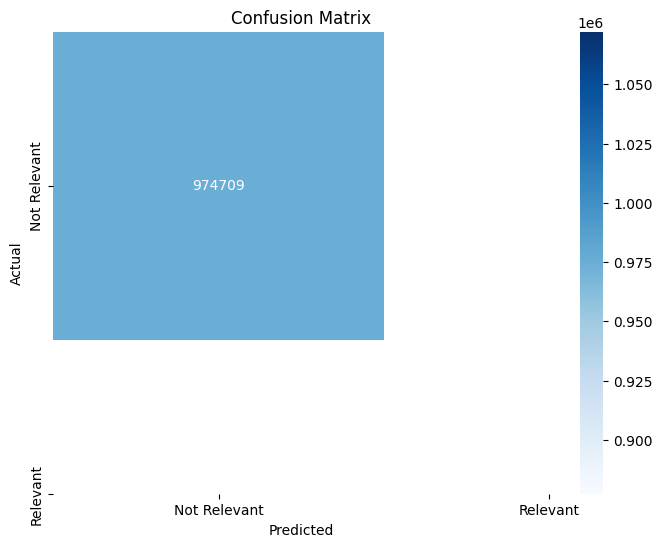

Plotting Error Distribution...


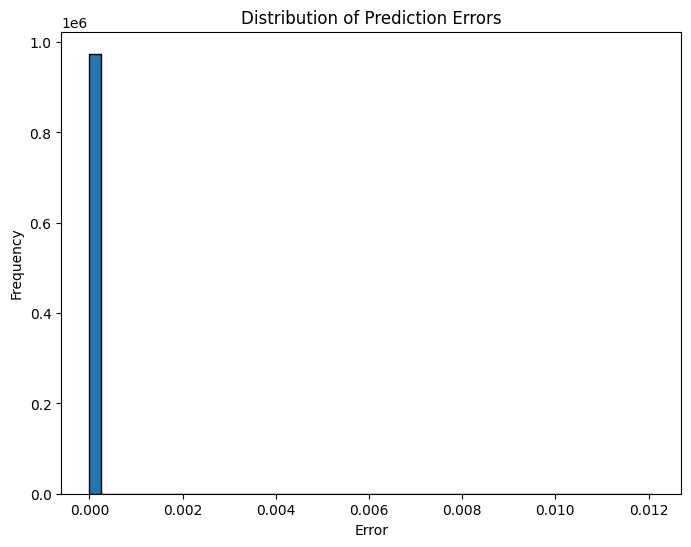

Plotting Precision-Recall Curve...


C:\Users\steph\anaconda3\envs\rec_env\lib\site-packages\sklearn\metrics\_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


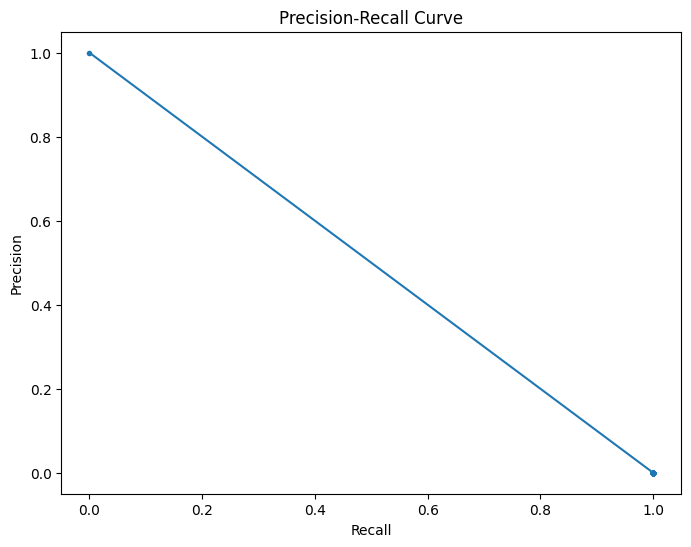

Top 10 recommendations for user User 1:
Item: Mosul, Predicted Rating: 0.00
Item: Mosul, Predicted Rating: 0.00
Item: Mosul, Predicted Rating: 0.00
Item: Mosul, Predicted Rating: 0.00
Item: Mosul, Predicted Rating: 0.00
Item: Mosul, Predicted Rating: 0.00
Item: Mosul, Predicted Rating: 0.00
Item: Mosul, Predicted Rating: 0.00
Item: Mosul, Predicted Rating: 0.00
Item: Mosul, Predicted Rating: 0.00


In [20]:
import pandas as pd
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import precision_recall_curve

# Prepare your data for the Surprise library
def prepare_data(df):
    print("Original columns:", df.columns)
    df = df.rename(columns={'Profile Name': 'user', 'Title': 'item', 'Interaction': 'rating'})
    return df[['user', 'item', 'rating']]

# Function to ensure columns are numeric
def clean_and_convert_columns(df):
    df['Bookmark'] = pd.to_numeric(df['Bookmark'], errors='coerce').fillna(0)
    df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce').fillna(0)
    return df

# Clean the DataFrame
merge_2 = clean_and_convert_columns(merge_2)

# Create a user-item matrix
def create_interaction_matrix(df):
    df['Interaction'] = df['Bookmark'] * 5 + df['Duration'] * 0.1  # Adjust weights as needed
    interaction_matrix = df.pivot_table(index='Profile Name', columns='Title', values='Interaction', fill_value=0)
    return interaction_matrix

interaction_matrix = create_interaction_matrix(merge_2)

# Prepare the DataFrame for Surprise
interaction_df = prepare_data(merge_2)

# Check the prepared DataFrame
print("Prepared DataFrame:")
print(interaction_df.head())

# Define the Reader for Surprise
reader = Reader(rating_scale=(0, 1))

# Load the data into Surprise
data = Dataset.load_from_df(interaction_df, reader)
trainset, testset = train_test_split(data, test_size=0.2)

# Start monitoring GridSearchCV
print("Starting GridSearchCV...")
param_grid = {
    'n_factors': [50, 100],  # Reduced for faster execution
    'lr_all': [0.005],       # Reduced for faster execution
    'reg_all': [0.02]        # Reduced for faster execution
}

grid_search = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)  # Use parallel jobs
grid_search.fit(data)
print("GridSearchCV completed.")

best_params = grid_search.best_params['rmse']
print(f"Best parameters: {best_params}")

# Train with the best parameters
model = SVD(n_factors=best_params['n_factors'], lr_all=best_params['lr_all'], reg_all=best_params['reg_all'])
model.fit(trainset)

# Predict on the test set
print("Starting predictions...")
predictions = model.test(testset)

# Extract true ratings and predicted ratings
true_ratings = [true_r[2] for true_r in testset]
predicted_ratings = [pred.est for pred in predictions]

# Convert ratings to binary outcomes with an adjusted threshold
threshold = 0.5
true_binary = [1 if rating >= threshold else 0 for rating in true_ratings]
pred_binary = [1 if rating >= threshold else 0 for rating in predicted_ratings]

# Calculate RMSE and MAE
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

# Calculate accuracy, recall, precision, and F1-score
accuracy_score_value = accuracy_score(true_binary, pred_binary)
recall_score_value = recall_score(true_binary, pred_binary)
precision_score_value = precision_score(true_binary, pred_binary, zero_division=1)
f1_score_value = f1_score(true_binary, pred_binary, zero_division=1)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'Accuracy: {accuracy_score_value}')
print(f'Recall: {recall_score_value}')
print(f'Precision: {precision_score_value}')
print(f'F1 Score: {f1_score_value}')

# Confusion Matrix
print("Plotting Confusion Matrix...")
conf_matrix = confusion_matrix(true_binary, pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Relevant', 'Relevant'], yticklabels=['Not Relevant', 'Relevant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Distribution of Errors
errors = np.array(predicted_ratings) - np.array(true_ratings)

print("Plotting Error Distribution...")
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, edgecolor='k')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(true_binary, predicted_ratings)

print("Plotting Precision-Recall Curve...")
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Top-N Recommendations
def get_top_n(predictions, n=10):
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if not top_n.get(uid):
            top_n[uid] = []
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

top_n = get_top_n(predictions, n=10)

# Display top recommendations for a specific user
user_id = 'User 1'  # Replace with actual user ID
if user_id in top_n:
    print(f"Top 10 recommendations for user {user_id}:")
    for item_id, rating in top_n[user_id]:
        print(f"Item: {item_id}, Predicted Rating: {rating:.2f}")
else:
    print(f"No recommendations found for user {user_id}.")
